# M1 project (UML)
- Cluster employees 



In [ ]:
!pip install xgboost -U -q
!pip install sklearn -U -q
!pip install fancyimpute -q
!pip install shap -q
!pip install umap-learn -q

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import fancyimpute as fi
import shap
import pickle
import itertools
import imblearn
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA




In [ ]:
#bankdata.groupby(['c1', "c2"]).mean()

#HR Dataset

###Import all the datasets to the notebook

In [ ]:
hr = pd.read_excel('/content/data_dictionary.xlsx')

In [ ]:
hr.to_csv('data_dictionary.csv')

In [ ]:
hr.head()

,Variable,Meaning,Levels
0,Age,Age of the employee,NaN
1,Attrition,Whether the employee left in the previous year...,NaN
2,BusinessTravel,How frequently the employees travelled for bus...,NaN
3,Department,Department in company,NaN
4,DistanceFromHome,Distance from home in kms,NaN


In [ ]:
hr1 = pd.read_csv('/content/employee_survey_data.csv')

In [ ]:
hr1.head()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0


In [ ]:
hr2 = pd.read_csv('/content/general_data.csv')

In [ ]:
hr2.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [ ]:
hr3 = pd.read_csv('/content/manager_survey_data.csv')

In [ ]:
hr3.head()

,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3


## Merge the dataset

Looking through all the datasets, we can see some of them share some of the same data, most notably the EmployeeID. This means we can merge them all using the pd.merge() function

In [ ]:
mergehr = pd.merge(hr1, hr2)

In [ ]:
hr_df = pd.merge(mergehr, hr3)

In [ ]:
hr_df.loc(['MonthlyIncome'] == 19990)

In [ ]:
hr_df.info() #Controlling if they have merged correctly

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   EnvironmentSatisfaction  4385 non-null   float64
 2   JobSatisfaction          4390 non-null   float64
 3   WorkLifeBalance          4372 non-null   float64
 4   Age                      4410 non-null   int64  
 5   Attrition                4410 non-null   object 
 6   BusinessTravel           4410 non-null   object 
 7   Department               4410 non-null   object 
 8   DistanceFromHome         4410 non-null   int64  
 9   Education                4410 non-null   int64  
 10  EducationField           4410 non-null   object 
 11  EmployeeCount            4410 non-null   int64  
 12  Gender                   4410 non-null   object 
 13  JobLevel                 4410 non-null   int64  
 14  JobRole                 

# Data cleaning

### Now we are going to clean the data by seeing how many NA's is in the dataset, and then make a judgement if too much data is going to be dropped.
### Furthermore we are going to look for typo's or errors in the dataset, whic needs to be corrected and columns that isn't for much use

In [ ]:
hr_df.isna().sum() #See how many Na's is in the individual columns

EmployeeID                  0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
JobInvolvement              0
PerformanceRating           0
dtype: int64

In [ ]:
hr_df.describe().T #This is used to get a drescription of the individual columns and then transposed for a more visually pleasing layout

,count,mean,std,min,25%,50%,75%,max
EmployeeID,4410.0,2205.500000,1273.201673,1.0,1103.25,2205.5,3307.75,4410.0
EnvironmentSatisfaction,4385.0,2.723603,1.092756,1.0,2.00,3.0,4.00,4.0
JobSatisfaction,4390.0,2.728246,1.101253,1.0,2.00,3.0,4.00,4.0
WorkLifeBalance,4372.0,2.761436,0.706245,1.0,2.00,3.0,3.00,4.0
Age,4410.0,36.923810,9.133301,18.0,30.00,36.0,43.00,60.0
DistanceFromHome,4410.0,9.192517,8.105026,1.0,2.00,7.0,14.00,29.0
Education,4410.0,2.912925,1.023933,1.0,2.00,3.0,4.00,5.0
EmployeeCount,4410.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
JobLevel,4410.0,2.063946,1.106689,1.0,1.00,2.0,3.00,5.0
MonthlyIncome,4410.0,65029.312925,47068.888559,10090.0,29110.00,49190.0,83800.00,199990.0


### Some desription conclusions
- No one is above 60, or under 18 and the average age is 37.
- Everyone has standard 8 hour workdays, but we can't see if they work more.
- Years in company is in average around 7 years, with 4 of the years under the same manager. 
- From 1 to 5 the job satisfaction is just under 3 which is okay'ish
- The same goes with job involvement, environment and worklife balance.

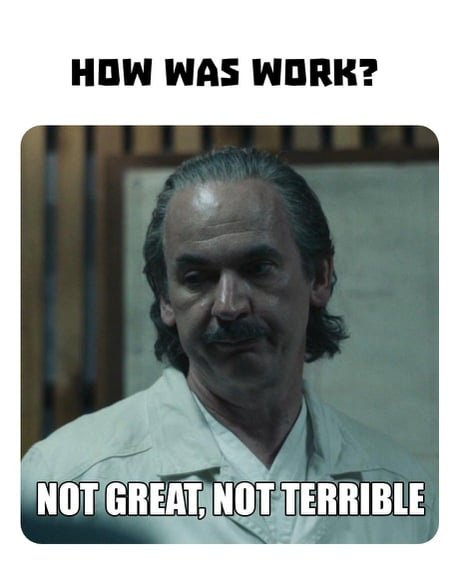

In [ ]:
#Replacing value with fillna with the rounded up to the closest integer 



hr_df.NumCompaniesWorked = hr_df.NumCompaniesWorked.fillna(3)

hr_df.EnvironmentSatisfaction = hr_df.EnvironmentSatisfaction.fillna(3)

hr_df.JobSatisfaction = hr_df.JobSatisfaction.fillna(3)

hr_df.WorkLifeBalance = hr_df.WorkLifeBalance.fillna(3)

hr_df.TotalWorkingYears = hr_df.TotalWorkingYears.fillna(11)


In [ ]:
#Because there are some duplicates all through the dataset, we're going to remove them to make the dataset lighter. It shouldn't have a major impact as the weighted average would be the same.
hr_df = hr_df.drop_duplicates(subset = ['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'Gender', 'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'])

# Unsupervised Machine Learning 


---


 - Preparing data
 -- Choosing model
 -- Scaling and fitting


---


 - Test data


---


 - revise and correct

In [ ]:
# Replace yes and no with 1 and 0. This is because we want to keep the Attrition in the model, but we need to change it from object to Integers
hr_df.Attrition.replace(('Yes', 'No'), (1, 0), inplace=True)


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
# As with Attrition we replace Female and Male with 1 and 0. This is because we want to keep the Gender in the model, but we need to change it from object to Integers
hr_df.Gender.replace(('Female', 'Male'), (1, 0), inplace=True)

In [ ]:
# To get rid of the data we don't want or need, we remove it from the dataframe.
hr_df.drop(['BusinessTravel', 'Department', 'Over18', 'StandardHours', 'EmployeeCount', 'EducationField', 'JobRole', 'MaritalStatus'], axis = "columns", inplace=True)


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
#With the .isna and .sum we see if there is any na's in the new dataframe. 
hr_df.isna().sum()

EmployeeID                 0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
Age                        0
Attrition                  0
DistanceFromHome           0
Education                  0
Gender                     0
JobLevel                   0
MonthlyIncome              0
NumCompaniesWorked         0
PercentSalaryHike          0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
JobInvolvement             0
PerformanceRating          0
dtype: int64

#Standard Scaler

In [ ]:
#Import scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
# with the scaler.fit_transfor we learn x-y relationships and transform the data.
hr_df_scaled = scaler.fit_transform(hr_df)

### Checking if the Age data has been scaled

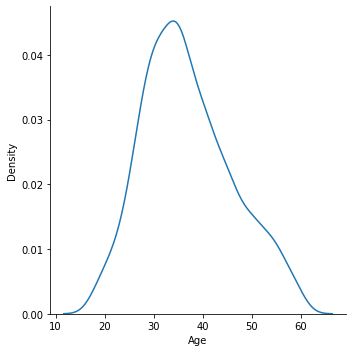

In [ ]:
# Age Pre-Scaling
sns.displot(data=hr_df, 
            x="Age",
            kind="kde")

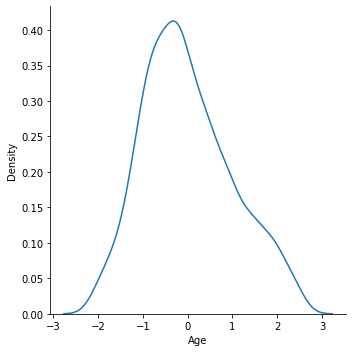

In [ ]:
# Age Post-Scaling
sns.displot(data=pd.DataFrame(hr_df_scaled, columns=hr_df.columns), 
            x="Age",
            kind="kde")

# PCA Model

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [ ]:
# fit and transform the data
data_reduced_pca = pca.fit_transform(hr_df_scaled)

In [ ]:
print(pca.components_)

[[ 0.00235559  0.01061066 -0.00809144  0.00780121  0.34638972 -0.14688787
   0.01782842 -0.00225703  0.02065235 -0.05236489  0.00529478  0.04027285
  -0.04900434  0.00214408  0.4752952  -0.00475555  0.50619472  0.40585272
   0.44993851  0.0118716  -0.0343931 ]
 [-0.03789409  0.0130082   0.05621428 -0.06069813  0.03751239  0.02105672
   0.06356477 -0.07907366 -0.04577768 -0.00822239  0.00947036  0.06790197
   0.69360695 -0.0077944   0.05849536 -0.06601688  0.02196589  0.00732274
   0.0067531   0.00507568  0.69498524]]


In [ ]:
pca.components_.shape

(2, 21)

In [ ]:
print(pca.explained_variance_ratio_)

[0.14395321 0.08538719]


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


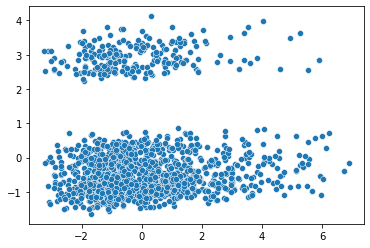

In [ ]:
# we can now plot the reduced data
sns.scatterplot(data_reduced_pca[:,0],data_reduced_pca[:,1])

In [ ]:
import altair as alt
vis_data = pd.DataFrame(data_reduced_pca)
vis_data['Gender'] = hr_df['Gender']
vis_data['MonthlyIncome'] = hr_df['MonthlyIncome']
vis_data.columns = ['x', 'y', 'Gender', 'MonthlyIncome']

In [ ]:
alt.Chart(vis_data).mark_circle(size=60).encode(
    x='x',
    y='y',
    tooltip=['Gender', 'MonthlyIncome']
).interactive()

alt.Chart(...)

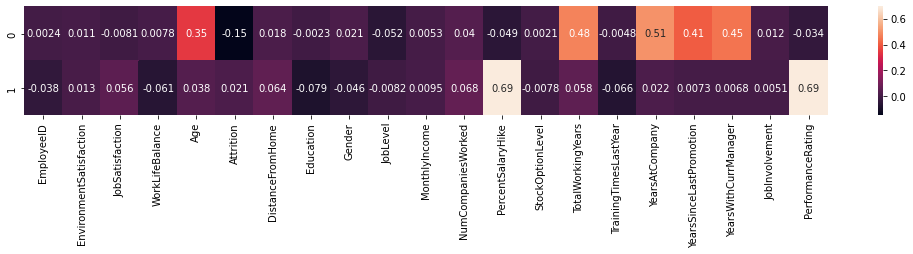

In [ ]:
plt.figure(figsize=(18,2))
sns.heatmap(pd.DataFrame(pca.components_, columns=hr_df.columns), annot=True)

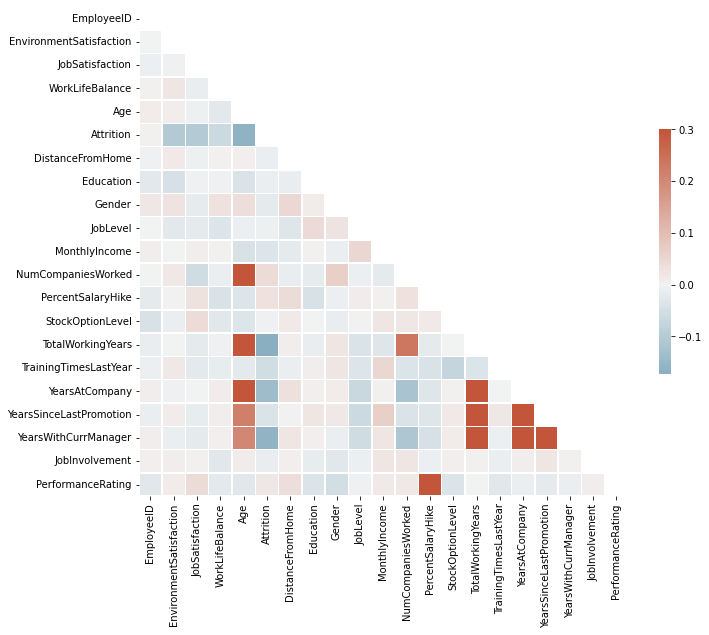

In [ ]:
#quick correlation check

# Compute the correlation matrix
corr = hr_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# UMAP Model


In [ ]:
import umap

In [ ]:
# we totally could specify more than 2 dimensions (as well as some other parameters)
umap_scaler = umap.UMAP()

In [ ]:
# umap accepts standard-scaled data
embeddings = umap_scaler.fit_transform(hr_df_scaled)

In [ ]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1493 entries, 0 to 4409
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               1493 non-null   int64  
 1   EnvironmentSatisfaction  1493 non-null   float64
 2   JobSatisfaction          1493 non-null   float64
 3   WorkLifeBalance          1493 non-null   float64
 4   Age                      1493 non-null   int64  
 5   Attrition                1493 non-null   int64  
 6   DistanceFromHome         1493 non-null   int64  
 7   Education                1493 non-null   int64  
 8   Gender                   1493 non-null   int64  
 9   JobLevel                 1493 non-null   int64  
 10  MonthlyIncome            1493 non-null   int64  
 11  NumCompaniesWorked       1493 non-null   float64
 12  PercentSalaryHike        1493 non-null   int64  
 13  StockOptionLevel         1493 non-null   int64  
 14  TotalWorkingYears       

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


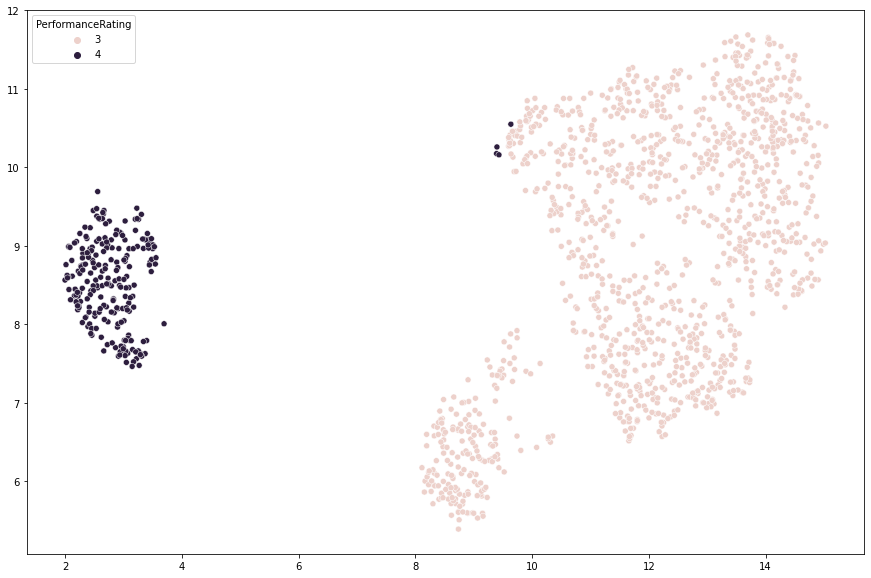

In [ ]:
# just as PCA, umap reduced data can be plottet. Looking for cluster-connections in PerformanceRating
from matplotlib import rcParams

rcParams['figure.figsize'] = 15,10
sns.scatterplot(embeddings[:,0],embeddings[:,1], hue = hr_df['PerformanceRating'], sizes=(400, 400))

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


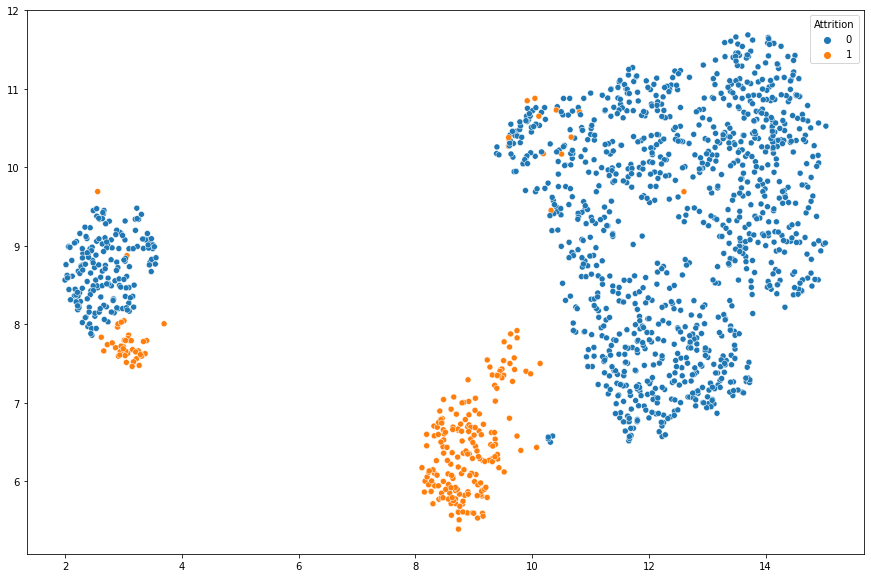

In [ ]:
# Looking for cluster-connections for Attrition 
rcParams['figure.figsize'] = 15,10
sns.scatterplot(embeddings[:,0],embeddings[:,1], hue = hr_df['Attrition'], sizes=(400, 400))

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


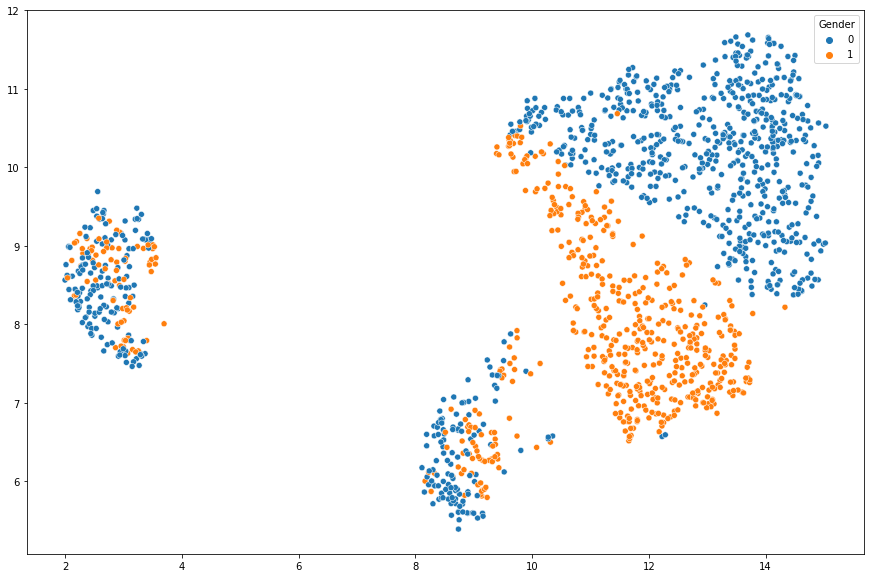

In [ ]:
# Looking for cluster-connections for Gender 
rcParams['figure.figsize'] = 15,10
sns.scatterplot(embeddings[:,0],embeddings[:,1], hue = hr_df['Gender'], sizes=(400, 400))

In [ ]:
from sklearn.cluster import KMeans
clusterer = KMeans(n_clusters=3)

### Sum of squared distances
The sum of squares measures the distance of datapoints away from the mean value. A higher sum of squares shows a higher variability, while a lower result shows a lower variability from the mean. 

Futhermore the Elbow Method is used to show the optimal number of Clusters.


In [ ]:

Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(hr_df_scaled)
    Sum_of_squared_distances.append(km.inertia_)

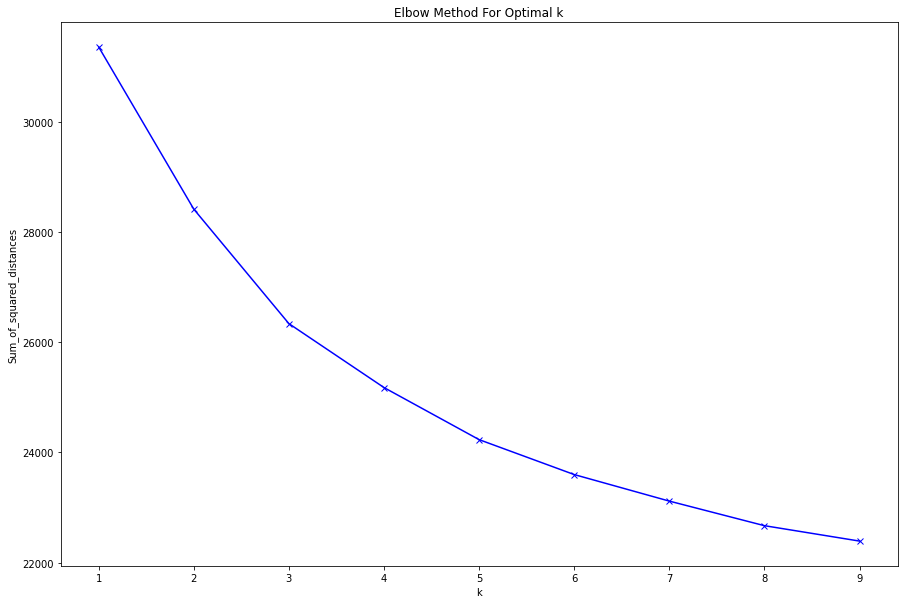

In [ ]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

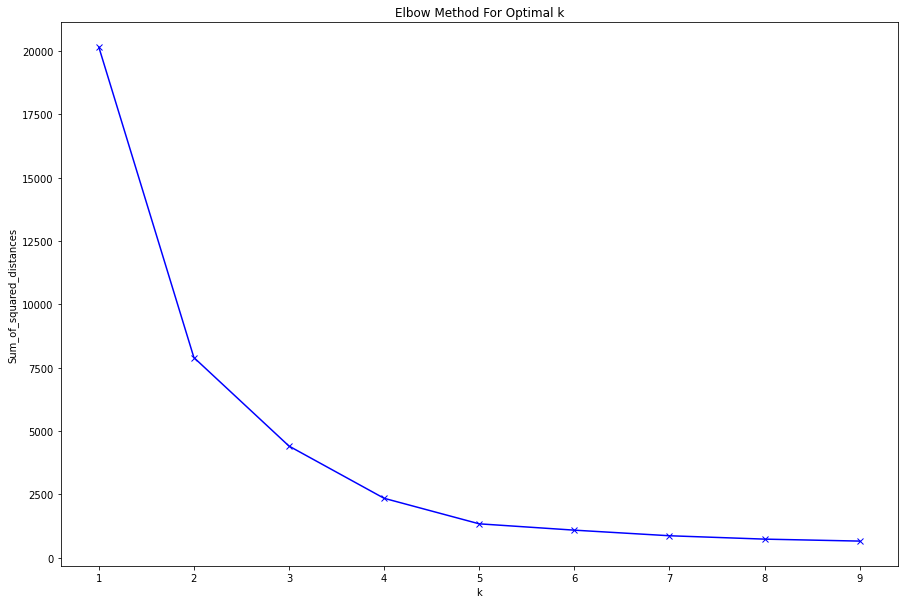

In [ ]:
umap_scaler_km = umap.UMAP(n_components=6)
embeddings_km = umap_scaler.fit_transform(hr_df_scaled)


Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(embeddings_km)
    Sum_of_squared_distances.append(km.inertia_)


plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:

# we take 3 clusters on non-reduced data. It is quite difficult to make out if the optimal number of clusters i two or three with the umap model
# But we would say three, as the slope declination start to really level out after 3.
clusterer.fit(hr_df_scaled)
KMeans(n_clusters=3)

KMeans(n_clusters=3)

In [ ]:
# we then copy the cluster-numbers into the 'cluster' file
hr_df['cluster'] = clusterer.labels_


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
hr_df.groupby('cluster').MonthlyIncome.mean()

cluster
0    67138.187135
1    63807.262032
2    66210.462963
Name: MonthlyIncome, dtype: float64

In [ ]:
# Turning the embeddings into a dataframe for showing the results.
vis_data = pd.DataFrame(embeddings)
vis_data['Gender'] = hr_df['Gender']
vis_data['cluster'] = hr_df['cluster']
vis_data['MonthlyIncome'] = hr_df['MonthlyIncome']
vis_data.columns = ['x', 'y', 'Gender', 'cluster','MonthlyIncome']

In [ ]:
# Because we saw some null data in our interactive graph, wanted to check if that is correct.
vis_data['cluster'].value_counts()

1.0    918
0.0    338
2.0    214
Name: cluster, dtype: int64

In [ ]:
# Remove null in vis_data
vis_data = vis_data[vis_data['cluster'] >= 0]

In [ ]:
#Putting our data into a interactive graph
alt.Chart(vis_data).mark_circle(size=60).encode(
    x='x',
    y='y',
    tooltip=['Gender', 'MonthlyIncome'],
    color=alt.Color('cluster:N', scale=alt.Scale(scheme='dark2')) #use N after the var to tell altair that it's categorical
).interactive()

alt.Chart(...)